In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import numpy as np
import nltk 

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv(r"D:\Datasets\user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [7]:
df.value_counts()

User ID  Device Model        Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  Age  Gender  User Behavior Class
1        Google Pixel 5      Android           393                       6.4                         1872                     67                        1122                 40   Male    4                      1
471      Samsung Galaxy S21  Android           248                       4.6                         1396                     52                        883                  40   Male    3                      1
463      Samsung Galaxy S21  Android           216                       5.9                         1789                     54                        987                  55   Male    3                      1
464      iPhone 12           iOS               290                       4.6                         1694                     50                        809      

In [8]:
from skimpy import skim 

In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 700    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ User ID                  │   0 │     0 │  350.5 │  202.2 │    1 │  175.8 │  350.5 │  525.2 │  700 │ ▇▇▇▇▇▇ │  │
│ │ App Usage Time (min/day) │   0 │     0 │  271.1 │  177.2 │   30 │  113.2 │  227.5 │  434.2 │  598 │ ▇▆▃▃▃▅ │  │
│ │ Screen On Time           │   0 │     0 │  5.273 │  3.069 │    1 │    2.5 │    4.9 │    7.4 │   12 │ ▇▆▅▅▂▃ │  │
│ │ (hours/day)              │     │       │        │        │      │        │        │        │      │        │  │
│ │ Battery Drain (mAh/day)  │   0 │     0 │   1525 │  819.1 │  302 │  722.2 │   1502 │   2230 │ 2993 │ ▇▅▅▅▅▅ │  │
│ │ Number of Apps Installed │   0 │     0 │  50.68 │  26.94 │   10 │     26 │     49 │     74 │   99 │ ▇▆▅▅▅▅ │  │
│ │ Data Usage (MB/day)      │   0 │     0 │  929.7 │  640.5 │  102 │    373 │  823.5 │   1341 │ 2497 │ ▇▅▅▃▂▂ │  │
│ │ Age                      │   0 │     0 │  38.48 │  12.01 │   18 │     28 │     38 │     49 │   59 │ ▇▇▇▇▇▇ │  │
│ │ User Behavior Class      │   0 │     0 │   2.99 │  1.401 │    1 │      2 │      3 │      4 │    5 │ ▇▇ ▇▇▇ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴──────┴────────┴────────┴────────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Device Model                     │      0 │         0 │                        2.6 │                  1821 │  │
│ │ Operating System                 │      0 │         0 │                          1 │                   700 │  │
│ │ Gender                           │      0 │         0 │                          1 │                   700 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
import dtale

In [11]:
dtale.show(df)

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [23]:
df['Gender']= lb.fit_transform(df['Gender'])

In [28]:
df['Operating System']= lb.fit_transform(df['Operating System'])

In [29]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [34]:
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [35]:
df['Device Model']=lb.fit_transform(df['Device Model'])

In [36]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,381,22,1,2
696,697,3,0,316,6.8,1965,68,1201,59,1,4
697,698,0,0,99,3.1,942,22,457,50,0,2
698,699,2,0,62,1.7,431,13,224,44,1,1


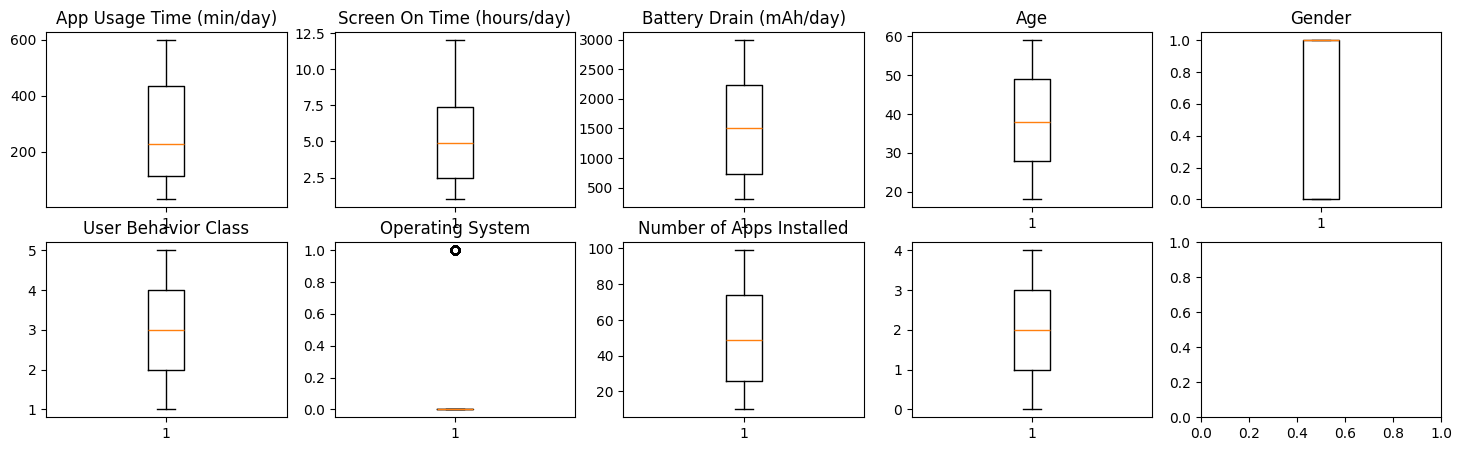

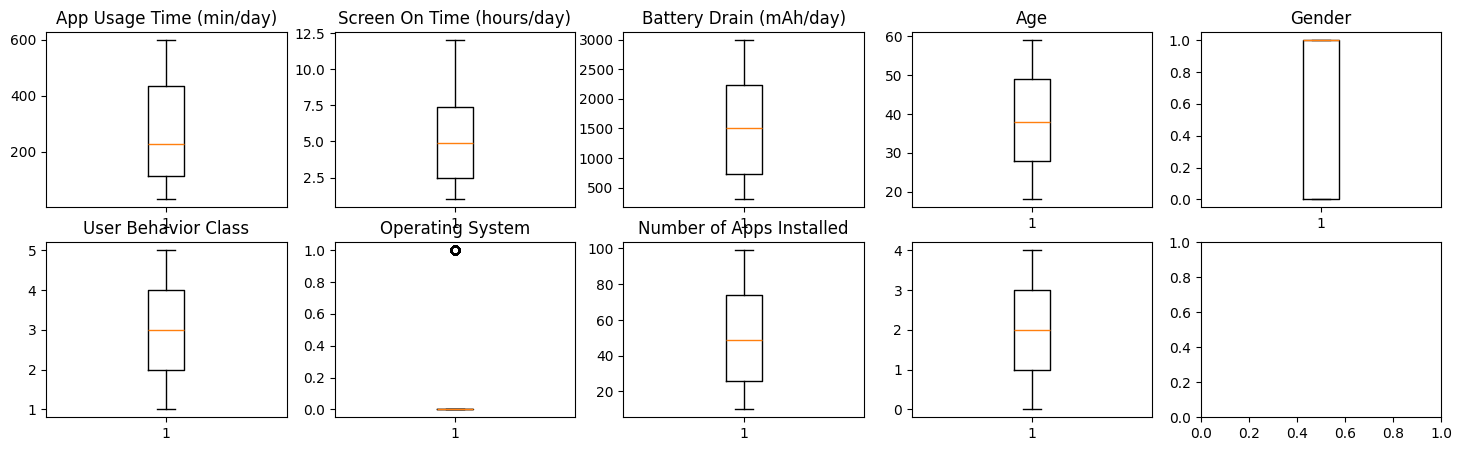

In [38]:
fig, ax = plt.subplots(figsize=(18,5),ncols=5,nrows=2)
ax[0,0].boxplot(df['App Usage Time (min/day)'],)
ax[0,0].set_title(' '.join('App Usage Time (min/day)'.split('_')))
ax[0,1].boxplot(df['Screen On Time (hours/day)'],)
ax[0,1].set_title(' '.join('Screen On Time (hours/day)'.split('_')))
ax[0,2].boxplot(df['Battery Drain (mAh/day)'],)
ax[0,2].set_title(' '.join('Battery Drain (mAh/day)'.split('_')))
ax[0,3].boxplot(df['Age'],)
ax[0,3].set_title(' '.join('Age'.split('_')))
ax[0,4].boxplot(df['Gender'],)
ax[0,4].set_title(' '.join('Gender'.split('_')))
ax[1,0].boxplot(df['User Behavior Class'],)
ax[1,0].set_title(' '.join('User Behavior Class'.split('_')))
ax[1,1].boxplot(df['Operating System'],)
ax[1,1].set_title(' '.join('Operating System'.split('_')))
ax[1,2].boxplot(df['Number of Apps Installed'],)
ax[1,2].set_title(' '.join('Number of Apps Installed'.split('_')))
ax[1,3].boxplot(df['Device Model'],)
ax[1,3].set_title('Device Model'.join(''.split('_')))
plt.show()

In [39]:
filter_data= df.copy()

In [40]:
filter_data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,381,22,1,2
696,697,3,0,316,6.8,1965,68,1201,59,1,4
697,698,0,0,99,3.1,942,22,457,50,0,2
698,699,2,0,62,1.7,431,13,224,44,1,1


In [42]:
# Apply IQR filtering column by column
for column in df.columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filter_data = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)]

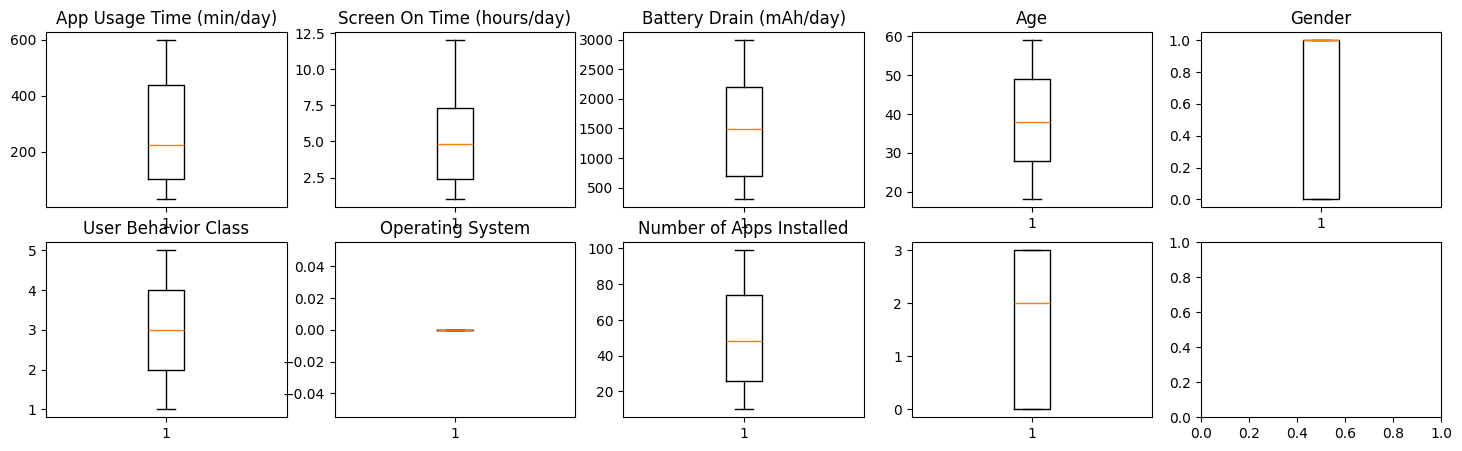

In [44]:
fig, ax = plt.subplots(figsize=(18,5),ncols=5,nrows=2)
ax[0,0].boxplot(filter_data['App Usage Time (min/day)'],)
ax[0,0].set_title(' '.join('App Usage Time (min/day)'.split('_')))
ax[0,1].boxplot(filter_data['Screen On Time (hours/day)'],)
ax[0,1].set_title(' '.join('Screen On Time (hours/day)'.split('_')))
ax[0,2].boxplot(filter_data['Battery Drain (mAh/day)'],)
ax[0,2].set_title(' '.join('Battery Drain (mAh/day)'.split('_')))
ax[0,3].boxplot(filter_data['Age'],)
ax[0,3].set_title(' '.join('Age'.split('_')))
ax[0,4].boxplot(filter_data['Gender'],)
ax[0,4].set_title(' '.join('Gender'.split('_')))
ax[1,0].boxplot(filter_data['User Behavior Class'],)
ax[1,0].set_title(' '.join('User Behavior Class'.split('_')))
ax[1,1].boxplot(filter_data['Operating System'],)
ax[1,1].set_title(' '.join('Operating System'.split('_')))
ax[1,2].boxplot(filter_data['Number of Apps Installed'],)
ax[1,2].set_title(' '.join('Number of Apps Installed'.split('_')))
ax[1,3].boxplot(filter_data['Device Model'],)
ax[1,3].set_title('Device Model'.join(''.split('_')))
plt.show()

In [ ]:
sns.kdeplot(filtered_data['Customer_Age'],ax=ax[0,0])
ax[0,0].set_title(' '.join('Customer_Age'.split('_')))

C:\Users\Aniket\AppData\Local\Temp\ipykernel_6208\3303242103.py:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



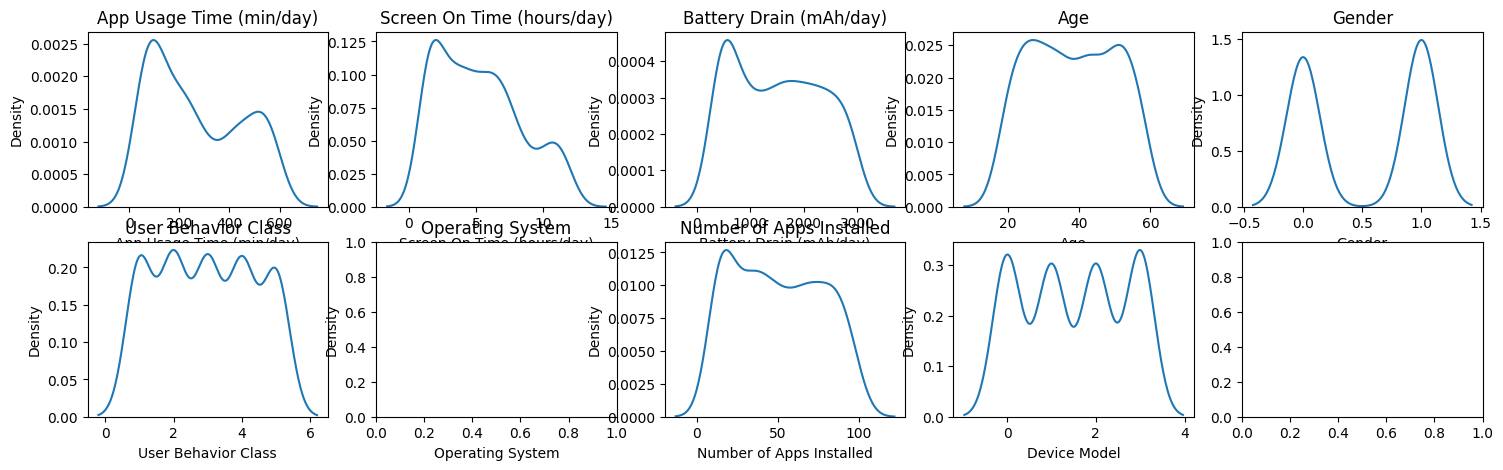

In [48]:
fig, ax = plt.subplots(figsize=(18,5),ncols=5,nrows=2)
sns.kdeplot(filter_data['App Usage Time (min/day)'],ax=ax[0,0])
ax[0,0].set_title(' '.join('App Usage Time (min/day)'.split('_')))
sns.kdeplot(filter_data['Screen On Time (hours/day)'],ax=ax[0,1])
ax[0,1].set_title(' '.join('Screen On Time (hours/day)'.split('_')))
sns.kdeplot(filter_data['Battery Drain (mAh/day)'],ax=ax[0,2])
ax[0,2].set_title(' '.join('Battery Drain (mAh/day)'.split('_')))
sns.kdeplot(filter_data['Age'],ax=ax[0,3])
ax[0,3].set_title(' '.join('Age'.split('_')))
sns.kdeplot(filter_data['Gender'],ax=ax[0,4])
ax[0,4].set_title(' '.join('Gender'.split('_')))
sns.kdeplot(filter_data['User Behavior Class'],ax=ax[1,0])
ax[1,0].set_title(' '.join('User Behavior Class'.split('_')))
sns.kdeplot(filter_data['Operating System'],ax=ax[1,1])
ax[1,1].set_title(' '.join('Operating System'.split('_')))
sns.kdeplot(filter_data['Number of Apps Installed'],ax=ax[1,2])
ax[1,2].set_title(' '.join('Number of Apps Installed'.split('_')))
sns.kdeplot(filter_data['Device Model'],ax=ax[1,3])
ax[1,3].set_title('Device Model'.join(''.split('_')))
plt.show()

In [49]:
filter_data.describe()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,554.000000,554.000000,554.0,554.000000,554.000000,554.000000,554.000000,554.00000,554.000000,554.000000,554.000000
mean,349.944043,1.510830,0.0,268.258123,5.231047,1508.198556,50.142599,920.31769,38.357401,0.527076,2.960289
std,206.465919,1.136629,0.0,179.188678,3.096491,819.547037,26.923028,644.75079,11.908879,0.499718,1.409812
min,1.000000,0.000000,0.0,30.000000,1.000000,302.000000,10.000000,102.00000,18.000000,0.000000,1.000000
25%,167.250000,0.000000,0.0,104.250000,2.425000,691.750000,26.000000,366.50000,28.000000,0.000000,2.000000
50%,350.500000,2.000000,0.0,225.000000,4.800000,1489.000000,48.000000,818.50000,38.000000,1.000000,3.000000
75%,533.500000,3.000000,0.0,436.750000,7.300000,2200.500000,74.000000,1340.00000,49.000000,1.000000,4.000000
max,700.000000,3.000000,0.0,598.000000,12.000000,2993.000000,99.000000,2497.00000,59.000000,1.000000,5.000000


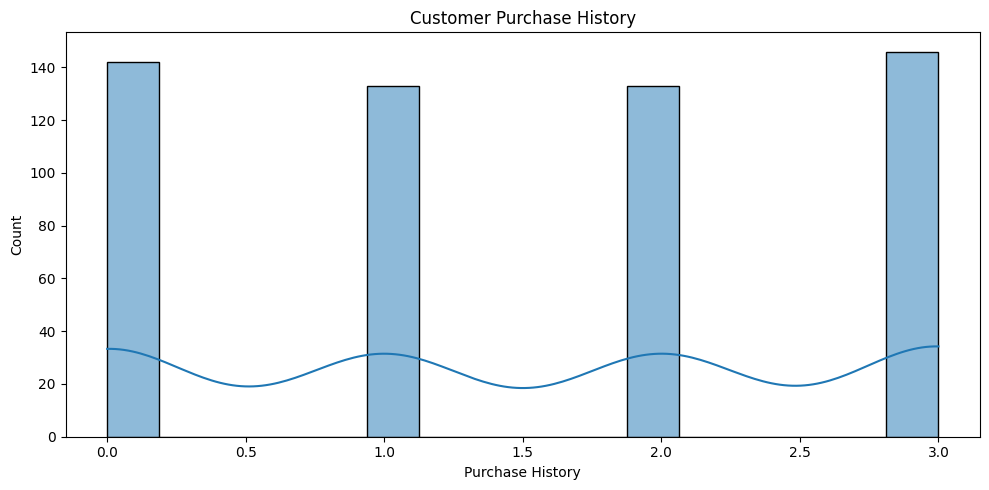

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(filter_data['Device Model'],kde=True,bins=16)
plt.xlabel('Purchase History')
plt.title('Customer Purchase History')

plt.tight_layout()
plt.show()

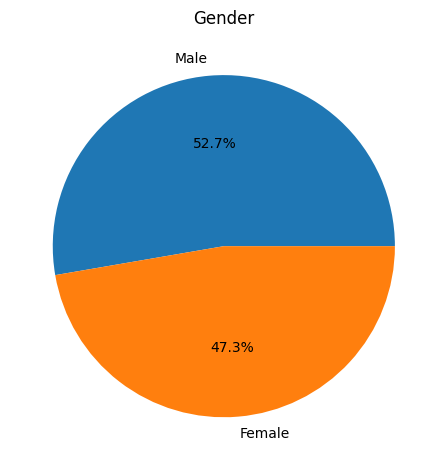

In [54]:
plt.pie(filter_data['Gender'].value_counts(),
        labels=['Male','Female'],
        autopct='%1.1f%%')

plt.title('Gender')
plt.tight_layout()
plt.show()

In [56]:
filter_data.nunique()

User ID                       554
Device Model                    4
Operating System                1
App Usage Time (min/day)      341
Screen On Time (hours/day)    107
Battery Drain (mAh/day)       498
Number of Apps Installed       86
Data Usage (MB/day)           477
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

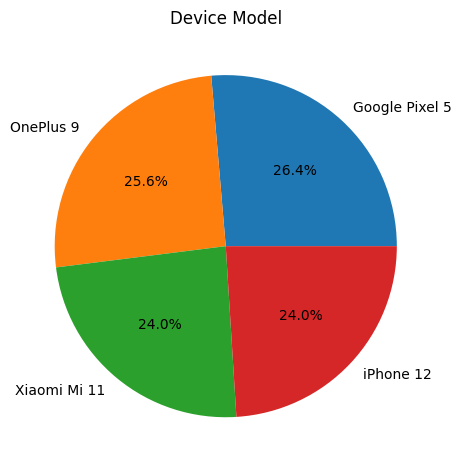

In [57]:
plt.pie(filter_data['Device Model'].value_counts(),
        labels=['Google Pixel 5','OnePlus 9','Xiaomi Mi 11','iPhone 12'],
        autopct='%1.1f%%')

plt.title('Device Model')
plt.tight_layout()
plt.show()

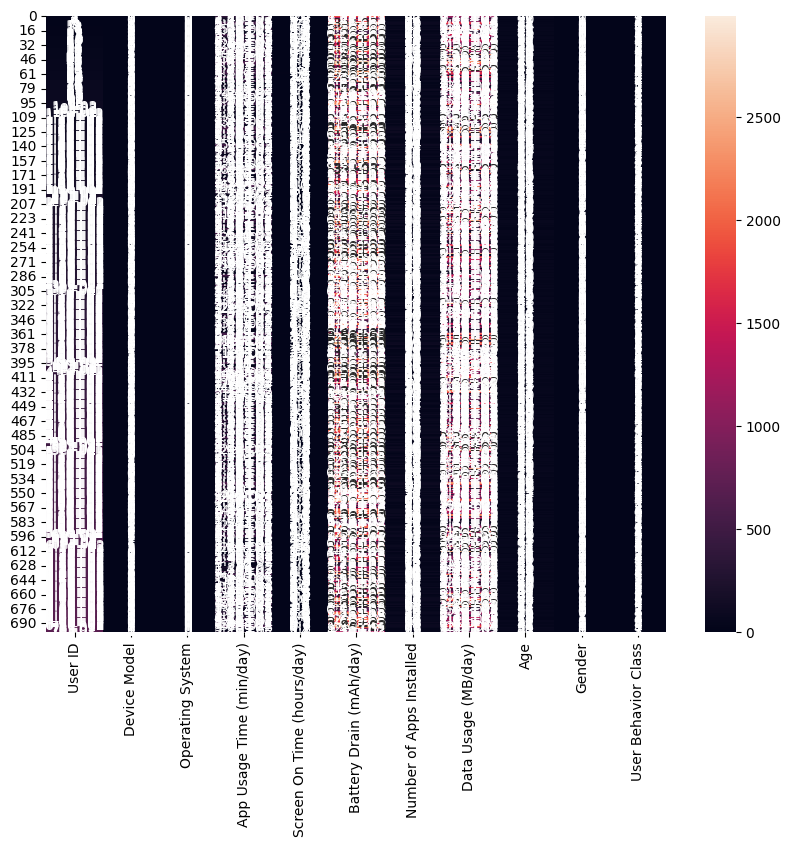

In [60]:
plt.figure(figsize=(10,8))
filter_data.corr(numeric_only=True)
sns.heatmap(filter_data,annot=True)
plt.show()

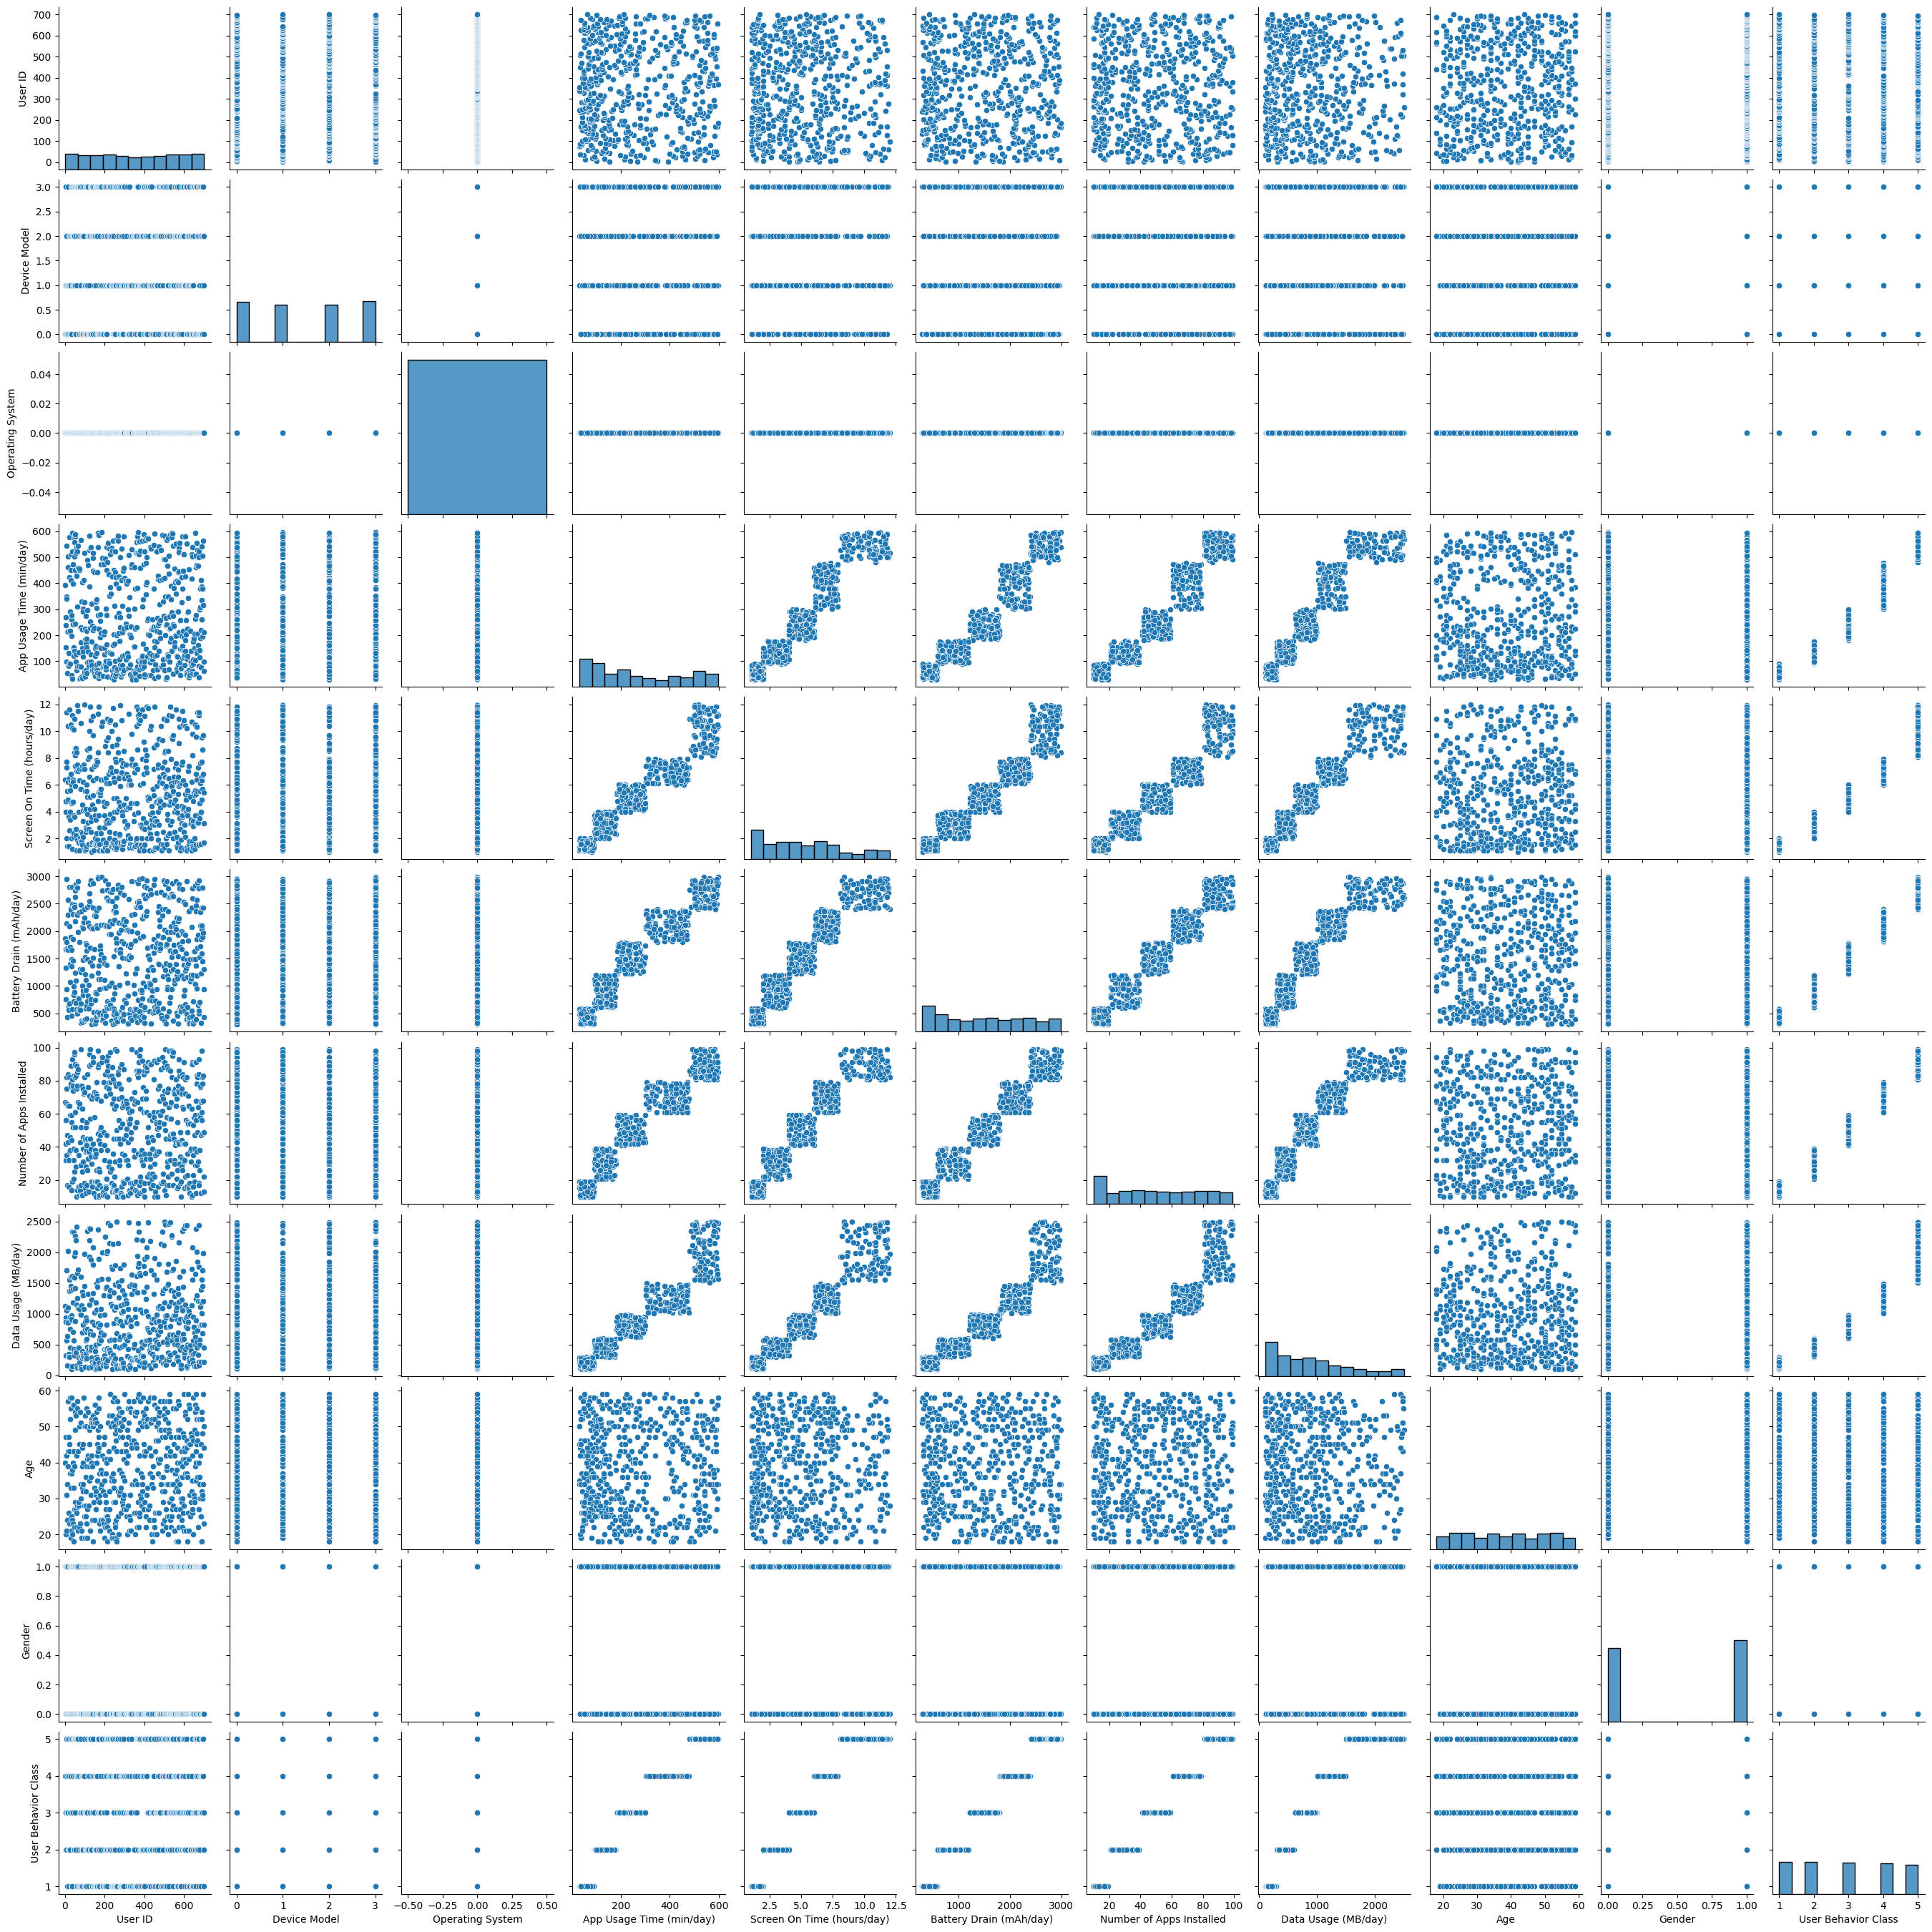

In [61]:
sns.pairplot(filter_data)
plt.show()

In [62]:
filter_data.to_csv(r'data.csv')

In [63]:
skim(filter_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 554    │ │ int32       │ 10    │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p50    ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ User ID                 │   0 │     0 │   349.9 │   206.5 │    1 │  167.2 │  350.5 │ 533.5 │  700 │ ▇▇▇▇▇▇ │  │
│ │ Device Model            │   0 │     0 │   1.511 │   1.137 │    0 │      0 │      2 │     3 │    3 │ ▇ ▇ ▇▇ │  │
│ │ Operating System        │   0 │     0 │       0 │       0 │    0 │      0 │      0 │     0 │    0 │     ▇  │  │
│ │ App Usage Time          │   0 │     0 │   268.3 │   179.2 │   30 │  104.2 │    225 │ 436.8 │  598 │ ▇▅▃▂▃▅ │  │
│ │ (min/day)               │     │       │         │         │      │        │        │       │      │        │  │
│ │ Screen On Time          │   0 │     0 │   5.231 │   3.096 │    1 │  2.425 │    4.8 │   7.3 │   12 │ ▇▅▅▅▂▃ │  │
│ │ (hours/day)             │     │       │         │         │      │        │        │       │      │        │  │
│ │ Battery Drain (mAh/day) │   0 │     0 │    1508 │   819.5 │  302 │  691.8 │   1489 │  2200 │ 2993 │ ▇▅▅▅▅▅ │  │
│ │ Number of Apps          │   0 │     0 │   50.14 │   26.92 │   10 │     26 │     48 │    74 │   99 │ ▇▆▅▅▅▅ │  │
│ │ Installed               │     │       │         │         │      │        │        │       │      │        │  │
│ │ Data Usage (MB/day)     │   0 │     0 │   920.3 │   644.8 │  102 │  366.5 │  818.5 │  1340 │ 2497 │ ▇▅▅▃▂▂ │  │
│ │ Age                     │   0 │     0 │   38.36 │   11.91 │   18 │     28 │     38 │    49 │   59 │ ▇▇▇▇▇▇ │  │
│ │ Gender                  │   0 │     0 │  0.5271 │  0.4997 │    0 │      0 │      1 │     1 │    1 │ ▇    ▇ │  │
│ │ User Behavior Class     │   0 │     0 │    2.96 │    1.41 │    1 │      2 │      3 │     4 │    5 │ ▇▇ ▇▇▇ │  │
│ └─────────────────────────┴─────┴───────┴─────────┴─────────┴──────┴────────┴────────┴───────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [64]:
import sweetviz as SV

In [66]:
report = SV.analyze(filter_data)
report.show_html('Device.html')

                                             |                                             | [  0%]   00:00 ->…

Report Device.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
